## This is the Growth Analytics Challenge, part of Deel assessment for a senior data analyst position
### Author: Levy Shemtov

### Initialize Settings and Import Packages and Datasets

In [76]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.precision", 8)

paid_platform_data = pd.read_csv("/Users/levy/Downloads/Growth Analytics Challenge - Dataset - Nov2023 - Paid Platform Data.csv")
conversion_data = pd.read_csv("/Users/levy/Downloads/Growth Analytics Challenge - Dataset Conversion Data.csv")

In [77]:
paid_platform_data.head()

,Utm Medium,Utm Source,Traffic Week,# Impressions,# Clicks,$ Cost
0,paid-social,linkedin,2023-10-23,4881796,21954,"$169,017.58"
1,paid-social,linkedin,2023-10-16,6335386,15776,"$174,972.20"
2,paid-social,linkedin,2023-10-09,4485024,35009,"$327,466.25"
3,paid-social,linkedin,2023-10-02,4348074,27765,"$272,559.09"
4,paid-social,linkedin,2023-09-25,5962092,31388,"$249,770.65"


In [78]:
conversion_data.head()

,Touched Date,Utm Medium,Utm Source,Utm Campaign,# Demo Occurred,# Sales Qualified Opportunity,# Closed Won Opportunity
0,2023-10-29,paid-search,google,nam-t1_acq_searchnonbranded_google_search_countryhire--_gh_all,2.5,0.0,0.0
1,2023-10-29,paid-listicle,peoplemanagingpeople,ww_acq_prosp_pmp_paidlist_cadpayroll-pmp-__all,2.5,2.5,0.0
2,2023-10-29,paid-social,facebook,nam-t1_consider_calculate_fb_image_all-reengage-__all,2.4,0.0,0.0
3,2023-10-29,paid-search,google,emea-t1a_acq_searchnonbranded_google_search_payroll--_gp_all,0.0,0.0,0.0
4,2023-10-29,sponsored-newsletter,hrci,ww_engage_download_hrci_sponnewsletter_hr-hrbundle-oct23_hr_all,0.0,0.0,0.0


### Clean and Analyze datasets

In [79]:
paid_platform_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Utm Medium,84,2,paid-social,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utm Source,84,4,linkedin,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Traffic Week,84,21,2023-10-23,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
# Impressions,84.0,NaN,NaN,NaN,12319168.67857143,16806572.12189982,23783.0,1868817.75,4416549.0,13530960.75,68992149.0
# Clicks,84.0,NaN,NaN,NaN,99923.98809524,102480.76936563,2544.0,26509.0,43895.5,135336.5,416503.0
$ Cost,84,84,"$169,017.58",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
conversion_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Touched Date,11011,147,2023-09-26,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utm Medium,11011,184,paid-search,4976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utm Source,11011,281,google,5012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utm Campaign,9884,1039,nam-t1_acq_searchbrand_google_search_broad--__all,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
# Demo Occurred,11011.0,NaN,NaN,NaN,1.79299791,3.57033786,0.0,0.0,0.9,2.4,107.7
# Sales Qualified Opportunity,11011.0,NaN,NaN,NaN,0.95650713,2.68733128,0.0,0.0,0.0,1.0,58.5
# Closed Won Opportunity,11011.0,NaN,NaN,NaN,0.2131414,1.11787103,0.0,0.0,0.0,0.0,43.3


In [81]:
paid_platform_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Utm Medium     84 non-null     object
 1   Utm Source     84 non-null     object
 2   Traffic Week   84 non-null     object
 3   # Impressions  84 non-null     int64 
 4   # Clicks       84 non-null     int64 
 5   $ Cost         84 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.1+ KB


In [82]:
print(f"There are no missing values in the conversion_data dataset")

There are no missing values in the conversion_data dataset


In [83]:
conversion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11011 entries, 0 to 11010
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Touched Date                   11011 non-null  object 
 1   Utm Medium                     11011 non-null  object 
 2   Utm Source                     11011 non-null  object 
 3   Utm Campaign                   9884 non-null   object 
 4   # Demo Occurred                11011 non-null  float64
 5   # Sales Qualified Opportunity  11011 non-null  float64
 6   # Closed Won Opportunity       11011 non-null  float64
dtypes: float64(3), object(4)
memory usage: 602.3+ KB


In [84]:
missing_values = conversion_data["Utm Campaign"].isnull().sum()
print(f"There are {missing_values} missing values in the campaign field for the conversion_data dataset"
      f"since we will not be working with this field, I will not be filling these missing values")

There are 1127 missing values in the campaign field for the conversion_data datasetsince we will not be working with this field, I will not be filling these missing values


In [85]:
paid_platform_data.duplicated().sum()

0

In [86]:
conversion_data.duplicated().sum()

0

#### Updating data types

In [87]:
# convert Touched Date to date time type
conversion_data['Touched Date'] = pd.to_datetime(conversion_data['Touched Date'])

# convert Traffic Week to date time type
paid_platform_data['Traffic Week'] = pd.to_datetime(paid_platform_data['Traffic Week'])

# convert $ Cost to float
paid_platform_data['$ Cost'] = paid_platform_data['$ Cost'].str.replace('[\$,]', '', regex=True).astype(float)

#### Detecting and removing outliers

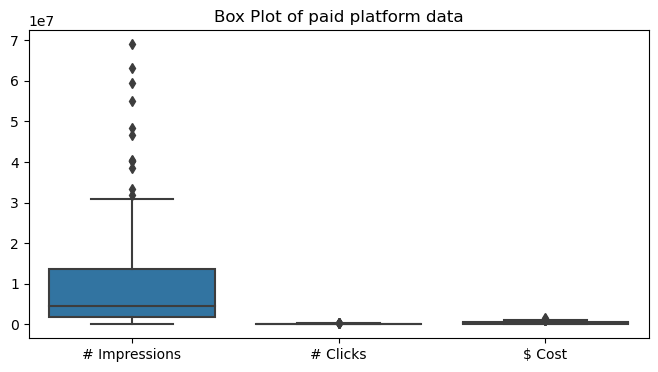

In [88]:
# detecting outlier for paid_platform_data
paid_platform_data_numeric = paid_platform_data.select_dtypes(include=['float64', 'int64'])

# Creating a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=paid_platform_data_numeric)
plt.title('Box Plot of paid platform data')
plt.show()

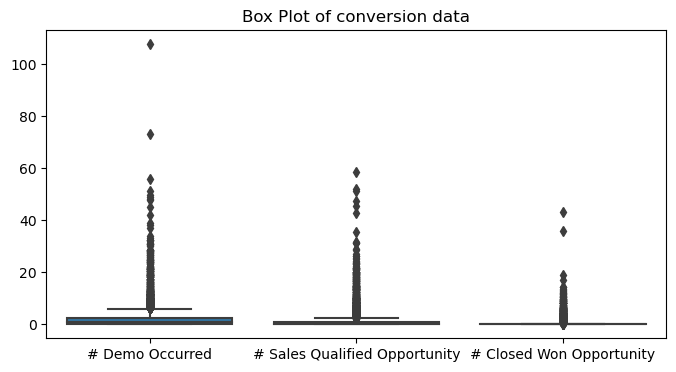

In [89]:
# detecting outlier for conversion_data
conversion_data_numeric = conversion_data.select_dtypes(include=['float64', 'int64']) 

# conversion_data_numeric = conversion_data_numeric.groupby("Touched Date").sum()

# Creating a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=conversion_data_numeric)
plt.title('Box Plot of conversion data')
plt.show()

In [90]:
def remove_outliers(df):
    """
    Remove outliers from all numeric columns in a DataFrame using Standard Deviation Method

    Parameters: DataFrame

    Returns:pd.DataFrame: The DataFrame with outliers removed.
    """
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column_name in numeric_columns:
        data_mean, data_std = np.mean(df[column_name]), np.std(df[column_name])
        cut_off = data_std * 4 
        lower, upper = data_mean - cut_off, data_mean + cut_off
        outliers = (df[column_name] < lower) | (df[column_name] > upper)
        df = df[~outliers]

    return df

# Applying remove_outliers function
conversion_data = remove_outliers(conversion_data)
paid_platform_data = remove_outliers(paid_platform_data)

### Task 1: Analyzing Sales Funnel Data

### 1.1 Time series analysis on the number of demo bookings, sales qualified opportunities, and closed won opportunities.

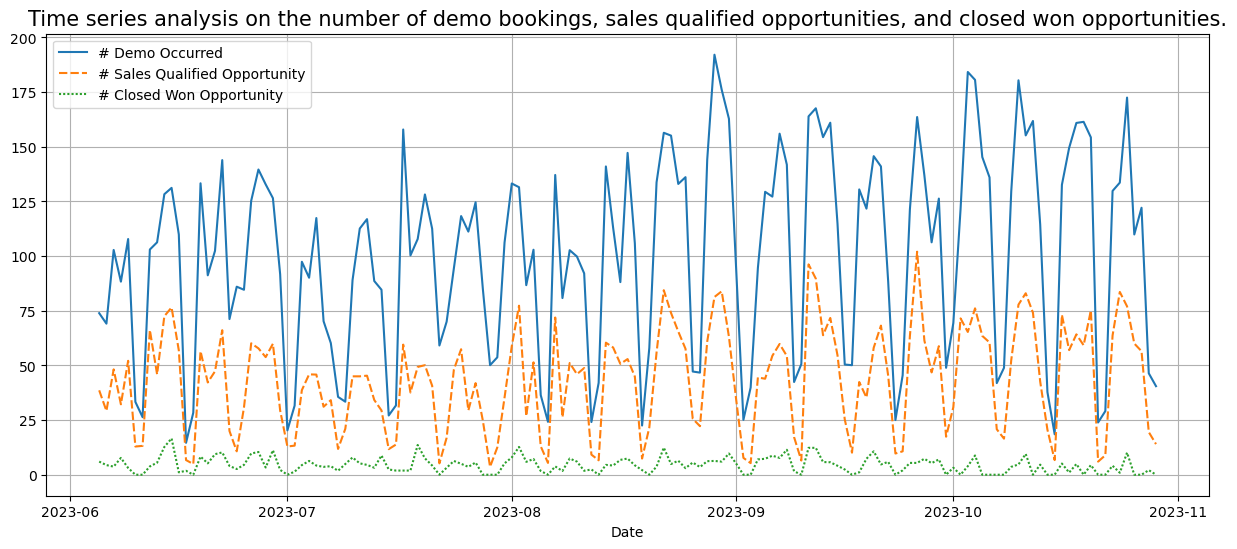

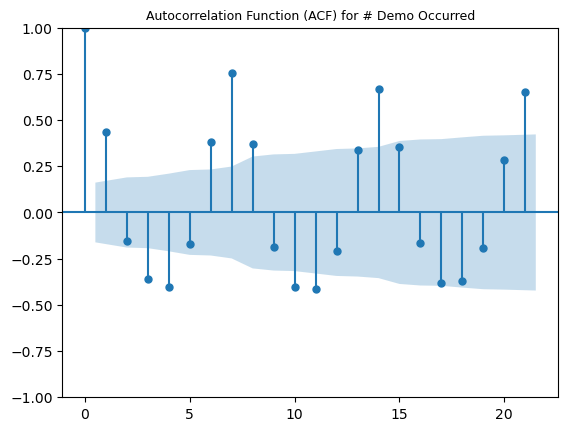

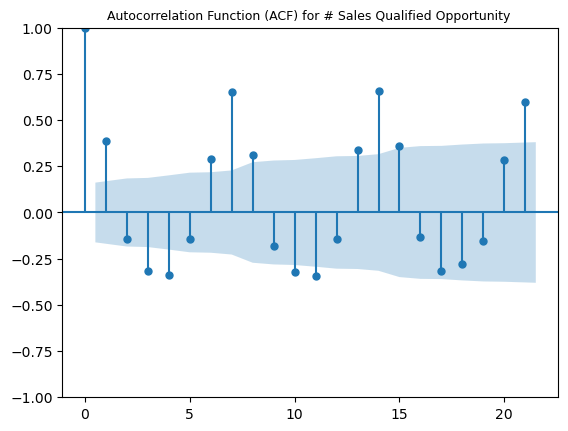

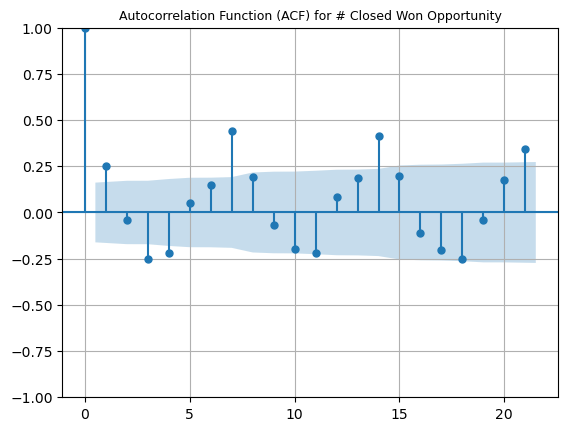

In [91]:
def time_series_analysis(df):
    """
    Perform time series analysis.

    Parameters: DataFrame 

    Returns: Displays time series analysis plots.
    """
    # Filtering out fields for time series analysis
    seasonality_data = df[['Touched Date', '# Demo Occurred', '# Sales Qualified Opportunity', '# Closed Won Opportunity']]

    # Setting date as index
    seasonality_data = seasonality_data.set_index('Touched Date')

    # Aggregate the data by summing values for each unique Date
    seasonality_aggregated_data = seasonality_data.groupby(level=0).sum()

    # Plotting the time series
    plt.figure(figsize=(15, 6))
    plot = sns.lineplot(data=seasonality_aggregated_data)
    plt.title('Time series analysis on the number of demo bookings, sales qualified opportunities, and closed won opportunities.', fontsize=15)
    plt.xlabel('Date')
    plt.ylabel('')
    plt.grid(True)

    # Plot the autocorrelation functions for # Demo Occurred
    plot_acf(seasonality_aggregated_data['# Demo Occurred'], lags=21)
    plt.title('Autocorrelation Function (ACF) for # Demo Occurred', fontsize=9)

    # Plot the autocorrelation functions for # Sales Qualified Opportunity
    plot_acf(seasonality_aggregated_data['# Sales Qualified Opportunity'], lags=21)
    plt.title('Autocorrelation Function (ACF) for # Sales Qualified Opportunity ', fontsize=9)

    # Plot the autocorrelation functions for # Closed Won Opportunity
    plot_acf(seasonality_aggregated_data['# Closed Won Opportunity'], lags=21)
    plt.title('Autocorrelation Function (ACF) for # Closed Won Opportunity', fontsize=9)

    plt.grid(True)
    plt.show()
    
# Applying time_series_analysis
time_series_analysis(conversion_data)

A weekly seaonality can be observed in the time series analysis, a deeper analysis could be done to understand what days have historically high interactions and why interactions are high on these days. This could be followed by a targeted campaign on these days.

### 1.2: Conversion rates over time

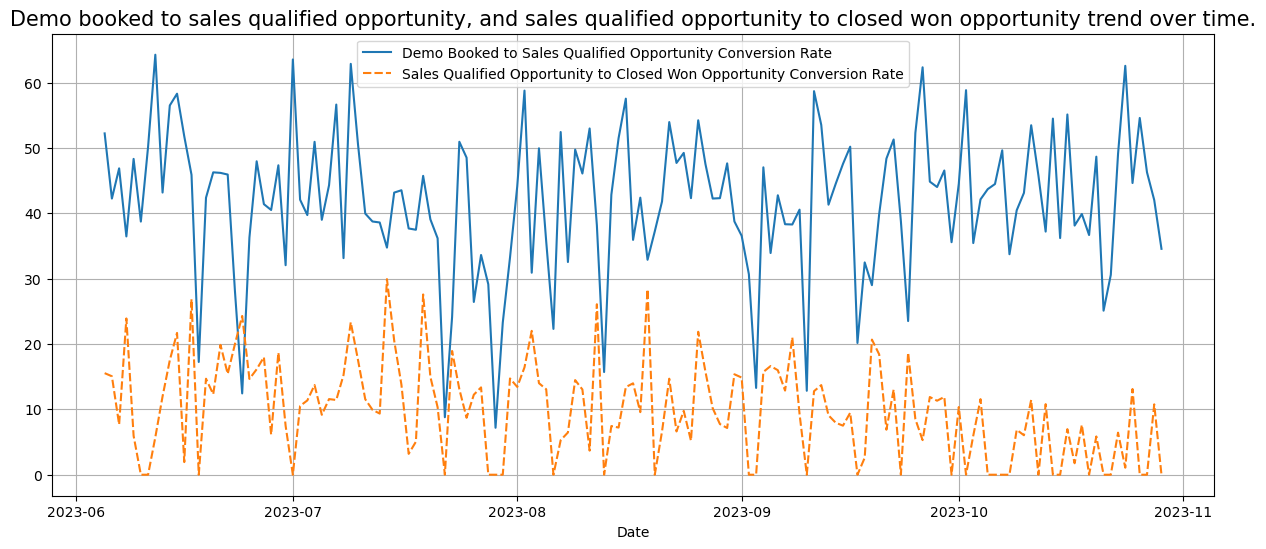

In [92]:
def plot_conversion_trend(df):
    """
    Calculate and plot conversion rate over time.

    Parameters: DataFrame

    Returns: Displays the plot.
    """
    # Filtering out fields for conversion calculation.
    conversion_trend_data = df[['Touched Date', '# Demo Occurred', '# Sales Qualified Opportunity', '# Closed Won Opportunity']]

    # Setting date as index
    conversion_trend_data = conversion_trend_data.set_index('Touched Date')

    # Aggregate the data by summing values for each unique Date
    conversion_trend_agg_data = conversion_trend_data.groupby(level=0).sum()

    # Calculate conversion rates
    conversion_trend_agg_data['Demo Booked to Sales Qualified Opportunity Conversion Rate'] = (
            conversion_trend_agg_data['# Sales Qualified Opportunity'] / conversion_trend_agg_data['# Demo Occurred']) * 100
    conversion_trend_agg_data['Sales Qualified Opportunity to Closed Won Opportunity Conversion Rate'] = (
            conversion_trend_agg_data['# Closed Won Opportunity'] / conversion_trend_agg_data[
        '# Sales Qualified Opportunity']) * 100

    conversion_trend_agg_data = conversion_trend_agg_data[[
        "Demo Booked to Sales Qualified Opportunity Conversion Rate",
        "Sales Qualified Opportunity to Closed Won Opportunity Conversion Rate"]]

    # Plotting the time series
    plt.figure(figsize=(15, 6))
    plot = sns.lineplot(data=conversion_trend_agg_data)
    plt.title('Demo booked to sales qualified opportunity, and sales qualified opportunity to closed won opportunity trend over time.', fontsize=15)
    plt.xlabel('Date')
    plt.ylabel('')
    plt.grid(True)

    return plt.show()

# Apply plot_conversion_trend function :
plot_conversion_trend(conversion_data)

### 1.3: Cost Per Acquisition (CPA) for UTM medium and source combinations

,Utm Medium,Utm Source,$ cpa
0,paid-search,bing,57000.19
1,paid-search,google,61726.08
2,paid-social,facebook,248515.79
3,paid-social,linkedin,731513.99


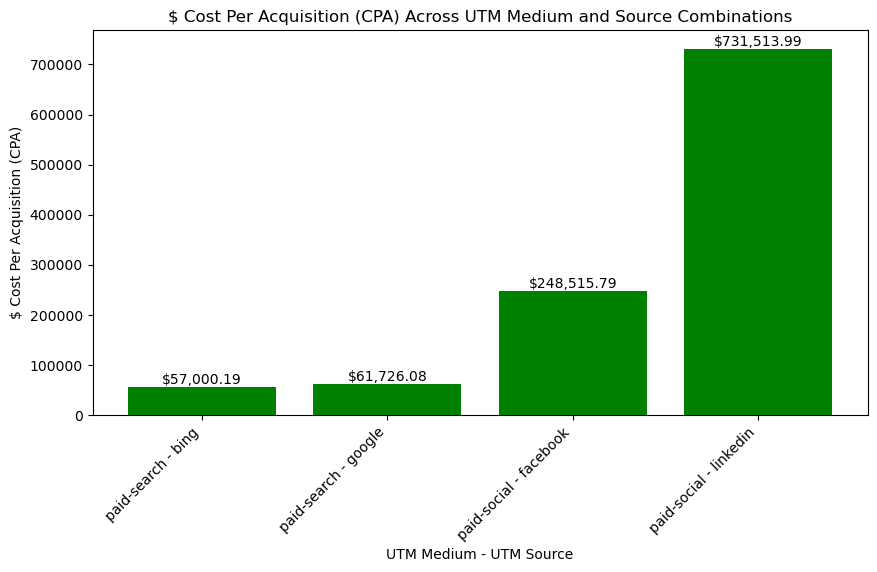

In [93]:
#  Cost Per Acquisition = Total cost to acquire customers / no of customers acquired

def calculate_and_plot_cpa(paid_platform_data, conversion_data):
    """
    Calculate and plot Cost Per Acquisition.

    Parameters: DataFrame

    Returns: Dataframe: Displays the plot.
    """
    # Calculating total cost to acquire customers
    cost_to_acquire_customers_data = paid_platform_data[["Utm Medium", "Utm Source", "$ Cost"]]
    cost_to_acquire_customers = cost_to_acquire_customers_data.groupby(["Utm Medium", "Utm Source"]).sum().reset_index()

    # Calculating number of acquired customer
    no_of_cx_acquired_data = conversion_data[["Utm Medium", "Utm Source", "# Closed Won Opportunity"]]
    no_of_new_cx_acquired = no_of_cx_acquired_data.groupby(["Utm Medium", "Utm Source"]).sum().reset_index()

    # Merge the dataframes on "Utm Medium" and "Utm Source"
    cpa_data = pd.merge(cost_to_acquire_customers, no_of_new_cx_acquired, on=["Utm Medium", "Utm Source"], how="inner")

    # Calculate Cost Per Acquisition (CPA)
    cpa_data['$ cpa'] = cpa_data['$ Cost'] / cpa_data['# Closed Won Opportunity']
    cpa_data['$ cpa'] = cpa_data['$ cpa'].round(2)
    cpa_data = cpa_data[["Utm Medium", "Utm Source", "$ cpa"]].sort_values("$ cpa",ascending= True )

    # Create a bar chart for CPA across UTM medium and source combinations
    plt.figure(figsize=(10, 5))
    bars = plt.bar(cpa_data['Utm Medium'] + ' - ' + cpa_data['Utm Source'], cpa_data['$ cpa'], color='green')
    plt.title('$ Cost Per Acquisition (CPA) Across UTM Medium and Source Combinations')
    plt.xlabel('UTM Medium - UTM Source')
    plt.ylabel('$ Cost Per Acquisition (CPA)')
    plt.xticks(rotation=45, ha='right') 
    
    cpa_formatted = ['${:,.2f}'.format(value) for value in cpa_data['$ cpa']]
    for bar, label in zip(bars, cpa_formatted):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, label, ha='center', va='bottom', color='black')
        
    # Display table
    return cpa_data

    # Display the chart
    return plt.show()
    
# Applying calculate_and_plot_cpa function:
calculate_and_plot_cpa(paid_platform_data, conversion_data)

Bing and Google have about 5 times less CPA compared to Facebook and more than 10 times less compared to Linkedin.
Paid search channels have on the average 15 times less CPA compared to paid social channels

### 1.4: Provide insights and recommendations on how to optimize the marketing strategy based on the sales funnel data.

##### Cost Efficiency: 
Bing and google appear to have much lower CPA compared to Facebook and Linkedin. Consider allocating more budget to Bing and google Ads or/and optimizing your Facebook and Linkedin campaigns to improve cost efficiency

##### Channel Prioritization; paid social vs paid search
Consider evaluating the overall performance of paid social compared to paid search. Since the CPA of paid social seems very high, check if the high CPA is justified by the value of customers acquired through this channel and consider a change in strategy.

##### LinkedIn Performance:
The CPA for LinkedIn is significantly higher than that of other channels; it's CPA is 6 times that of bing and google combined and 3 times that of facebook, Assess whether your audience on LinkedIn aligns with your target  profile and consider optimizing your LinkedIn targeting or reallocating resources to more cost-effective channels

##### Date-specific Campaigns:
Since there is a strong weekly seasonality trend, consider running targeted campaigns on days with historically high conversion rates to capitalize on success. Also, analyze underperforming dates to identify areas for improvement.

##### Customer Segmentation:
Segment your customer base to understand which group of customers are more likely to convert from demos to sales qualified opportunity to closed won opportunities. This information can enhance targeted marketing efforts and more personalized sales approaches.

##### Conversion Lag Investigation:
There is a delay in the conversion from sales qualified opportunity to closed won opportunity compared to demo booked to sales qualified opportunity. Further Investigate is required to understand the reasons behind the lag in the conversion from sales qualified opportunity to closed won opportunity.

## Task 2: Paid Marketing Channel Analysis

### 2.1: Click-through rate (CTR) for each of the four paid marketing channels on a weekly basis.

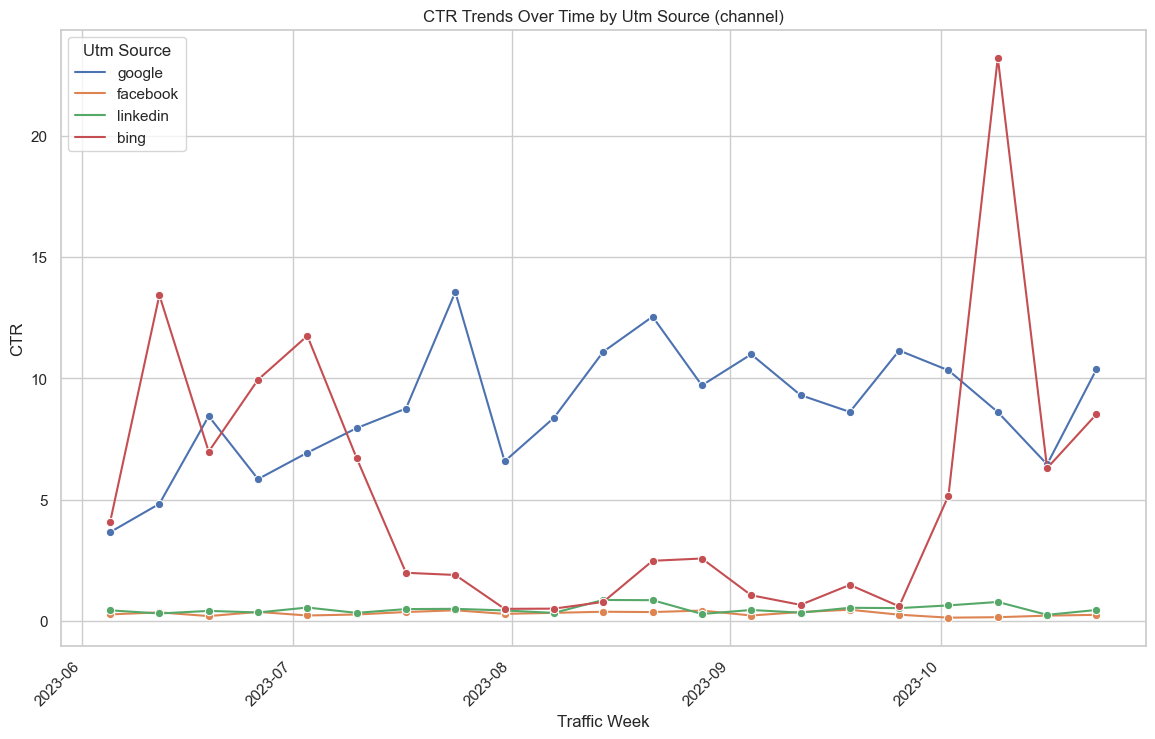

In [94]:
def plot_ctr_trends(df):
    """
    Plot Click-Through Rate (CTR = Clicks/Impressions) trends over time by Utm Source.

    Parameters: DataFrame.

    Returns: Displays the plot.
    """
    # Calculate Click-Through Rate (CTR)
    df["CTR"] = (df["# Clicks"] / df["# Impressions"]) * 100

    # Select relevant columns and sort by "Traffic Week"
    data_ctr = df[["CTR", "Traffic Week", "Utm Source"]].sort_values(by="Traffic Week", ascending=True)

    # Create a line plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='Traffic Week', y='CTR', hue='Utm Source', data=data_ctr, marker='o')

    # Add title and labels
    plt.title('CTR Trends Over Time by Utm Source (channel)')
    plt.xlabel('Traffic Week')
    plt.ylabel('CTR')
    plt.legend(title='Utm Source', loc='upper left')
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()
    
# Applying plot_ctr_trends:
plot_ctr_trends(paid_platform_data)

#### There are significant fluctuations in CTR trends over time for the various UTM sources

##### Google:
CTR moderately fluctuates but generally remains high.
Insignificant variations from week to week, but overall performance is consistently good.

##### LinkedIn & Facebook:
CTR is stable but consistently on the lower side.
Very minor fluctuations, but generally lower performance compared to Bing and Google.

##### Bing:
CTR shows strong fluctuations, a high of 24 and low of 1.
Significant variability, but overall performance is strong.

### 2.1: Provide recommendations on how to allocate the marketing budget effectively based onthe analysis of the paid marketing channels. Which channels should receive morebudget, and which ones should be scaled back?

To effectively allocate the marketing budget we need to analyze the performance of each channel. The key metrics to consider is Click-Through Rate (CTR) 

##### High-Performing Channels:

Google: Google consistently shows high CTR values across multiple weeks. Allocating more budget for Google Ads may be a good strategy.

Bing: Bing also demonstrates strong CTR performance, albeit with higher volatility compared to google. It is advisable to maintain or slightly increase the budget for Bing Ads.

Allocate a larger portion of the budget to Google and Bing, as they consistently perform well

##### Under-Performing Channels:

Facebook and LinkedIn: Facebook and LinkedIn consistently show lower CTR values compared to Google and Bing. You may consider scaling back the budget for Facebook and LinkedIn or optimizing your campaigns on this platform.

### How would you track and monitor the effectiveness of the revised budget allocation strategy over time, and what key performance indicators (KPIs) would you use to measure success?

#### Steps to Track and Monitor Effectiveness:

Set measurable business objectives

Implement Tracking Tools (Google Analytics, Facebook Insights, LinkedIn Analytics, and Bing Ads) reporting to track performance metrics.

Implement A/B testing 

#### Key Performance Indicators (KPIs) to Measure Success:

Click-Through Rate (CTR)

Return on Ad Spend (ROAS)

Cost per Click (CPC) 

Cost per Conversion:

Customer Acquisition Cost (CAC)

Conversion Funnel Metrics

### 2.4: Visualize the relationship between cost and sales funnel conversions over time. Are there any noticeable patterns or trends?

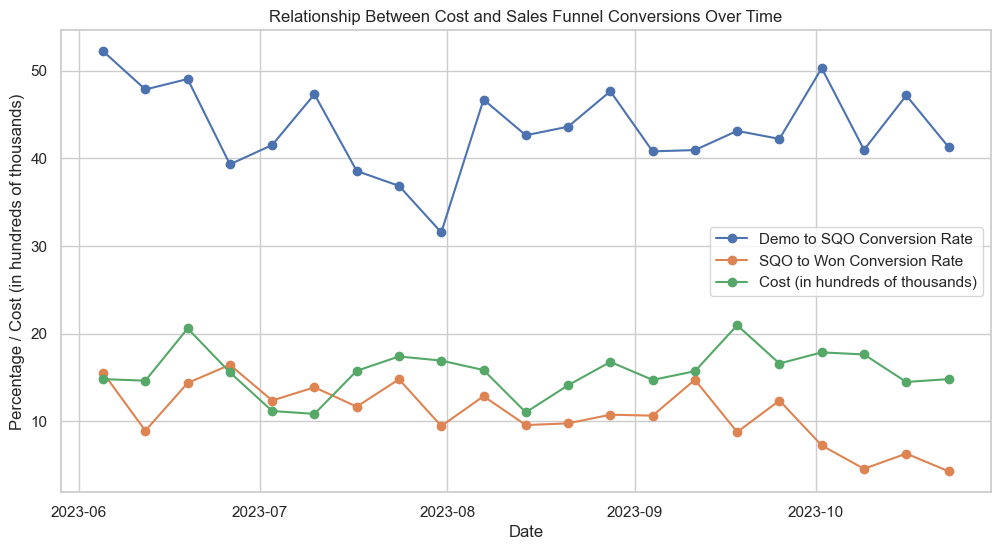

In [95]:
def visualize_cost_sales_conversion_over_time(paid_platform_data, conversion_data):
    """
    Visualize the relationship between cost and sales funnel conversions over time.

    Parameters:
    - paid_platform_data: DataFrame containing cost data with columns "Traffic Week" and "$ Cost".
    - conversion_data: DataFrame containing conversion data with columns "Touched Date", "# Demo Occurred", "# Sales Qualified Opportunity", "# Closed Won Opportunity".

    Returns: Displays the plot.
    """
    # Group by weeks and sum the values for paid_platform_data
    paid_platform_data_weekly = paid_platform_data[["Traffic Week", "$ Cost"]]
    paid_platform_data_weekly = paid_platform_data_weekly.set_index('Traffic Week').groupby(level=0).sum()

    # Group by weeks starting on Monday and sum the values for conversion_data
    conversion_data_weekly = conversion_data[['Touched Date', '# Demo Occurred', '# Sales Qualified Opportunity', '# Closed Won Opportunity']]
    conversion_data_weekly = conversion_data_weekly.set_index('Touched Date').resample('W-Mon').sum()

    # Merge the datasets on the date column
    cost_sales_conversion_data = pd.merge(conversion_data_weekly, paid_platform_data_weekly, left_index=True, right_index=True, how='inner')

    # Calculate conversion rates
    cost_sales_conversion_data['Demo Booked to Sales Qualified Opportunity Conversion Rate'] = (
            cost_sales_conversion_data['# Sales Qualified Opportunity'] / cost_sales_conversion_data['# Demo Occurred']) * 100
    cost_sales_conversion_data['Sales Qualified Opportunity to Closed Won Opportunity Conversion Rate'] = (
            cost_sales_conversion_data['# Closed Won Opportunity'] / cost_sales_conversion_data['# Sales Qualified Opportunity']) * 100

    cost_sales_conversion_data = cost_sales_conversion_data[[
        "Demo Booked to Sales Qualified Opportunity Conversion Rate",
        "Sales Qualified Opportunity to Closed Won Opportunity Conversion Rate", "$ Cost"]]

    # Plotting the data
    plt.figure(figsize=(12, 6))

    # Plot Demo to SQL Conversion Rate
    plt.plot(cost_sales_conversion_data.index, cost_sales_conversion_data["Demo Booked to Sales Qualified Opportunity Conversion Rate"], marker='o', label='Demo to SQO Conversion Rate')

    # Plot SQL to Won Conversion Rate
    plt.plot(cost_sales_conversion_data.index, cost_sales_conversion_data["Sales Qualified Opportunity to Closed Won Opportunity Conversion Rate"], marker='o', label='SQO to Won Conversion Rate')

    # Plot Cost
    plt.plot(cost_sales_conversion_data.index, cost_sales_conversion_data['$ Cost'] / 1e5, marker='o', label='Cost (in hundreds of thousands)')

    # Adding labels and legend
    plt.title('Relationship Between Cost and Sales Funnel Conversions Over Time')
    plt.xlabel('Date')
    plt.ylabel('Percentage / Cost (in hundreds of thousands)')
    plt.legend()

    # Display the plot
    plt.show()

# Applying visualize_cost_sales_conversion_over_time
visualize_cost_sales_conversion_over_time(paid_platform_data, conversion_data)

##### Are there any noticeable patterns or trends between cost and conversion?

For some months, there were inverse relationships between cost and conversion while in the others there were direct relationships. Hence no clear trend or pattern 


### Task 3: General Questions

### 3.1:  Are there any data quality issues or missing values in the datasets? How would you handle them if you found any?

There was mostly no missing values, except in the utm campaign field; this field was not utilized for the analysis hence I took no actions.
If there were missing values, I will consider whether it is missing completely at random (MCAR), missing at random (MAR), or missing not at random (MNAR). This will help me choose the most appropriate strategy to handle the missing data.
When dealing with missing data, there are several methods I'd consider. The most basic being to delete the data, although can be beneficial, but can also reduce the sample size and introduce bias if the missing data is not MCAR. Inputing the missing data is another option, this involves replacing the missing values with estimates (mean, median, forward filling, backward filling,etc.) based on other available data. This can help preserve the sample size and reduce bias, but it can also introduce error and uncertainty.

### 3.2: How would you handle outliers in the data? Are there any outliers in the provided datasets?

There are outliers in the provided data, in both datasets. I handled outliers by first visualising in a box plot then created a function that leveraged the Standard Deviation Method to identify and remove these outliers

### 3.3: Summarize the key takeaways and actionable recommendations from your analysis for anon-technical audience.

1. The conversion rate has a strong weekly seasonality trend, marketing campaigns can targeted on days with historically good performance for optimal conversion.

2. There is more delay in sales qualified opportunity to closed won opportunity conversion compared to demo booked to sales qualified opportunity conversion. Investigate the reasons behind the lag in the conversion from sales qualified opportunity to closed won opportunity. This may involve looking into the sales process, negotiation strategies, or customer engagement during this stage.

3. The Cost of acquring a customer(CPA) is highest for LinkedIn. LinkedIn's CPA is 6 times that of bing and google combined and 3 times that of facebook. Assess whether the audience on LinkedIn aligns with your target customer profile and consider adjusting your LinkedIn targeting or reallocating budget to more cost-effective channels like google and bing

4. CTR which indicates if users find your ads and listings helpful and relevant is both high and moderately stable for google and bing as compared to linkedin and facebook.

5. Paid search on the average is 15 times cheaper than paid social in terms of Cost of acquring a customer(CPA), consider allocating more resources to paid search and evaluating your target audience in paid social.

6. At a high level, there is no clear corellation or trend between cost and conversion; the more money invested into paid ads don't necessarily mean more conversion. Further analysis maybe required to see if this is true for the different channels

### 3.4: How would you describe the marketing attribution model in general? What attribution model do you propose for our business? Why?

I will describe your marketing attribution model as Last Touch Attribution

I'd propose a Position-Based Attribution: This model Allocates most credit to the first and last touchpoints, with the remaining credit distributed evenly among the touchpoints in between

Rationale:
Since this model gives credit to both the initial touchpoint that introduced customers to your brand and the final touchpoint that directly led to the conversion, It Captures the entire customer journey. It acknowledges the importance of both initial and final touchpoints and provides a balanced view of the conversion process.